### Analyzing tweakreg shifts

Author: Karl Gordon

5 Jul 2022

In [1]:
from tweakwcs import JWSTgWCS
from jwst import datamodels
from astropy.stats import sigma_clip
import numpy as np
import glob

In [2]:
n_tiles = 5
n_images_per_tile = 4

In [3]:
RAD2ARCSEC = 3600.0 * np.rad2deg(1.0)

filter = "F770W"
twfiles = np.sort(glob.glob(f"./{filter}/stage3/*wcs_tweakreg.fits"))

shifts = np.zeros((2, len(twfiles)))
for k, cfile in enumerate(twfiles):
    # extract x,y shifts from the aligned image:
    aligned_model = datamodels.open(cfile)
    matrix = aligned_model.meta.wcs.forward_transform['tp_affine'].matrix.value
    cshift = RAD2ARCSEC * aligned_model.meta.wcs.forward_transform['tp_affine'].translation.value
    shifts[:, k] = cshift
    print(cfile, cshift, aligned_model.meta.guidestar.gs_id)

./F770W/stage3/jw02107039001_02101_00001_mirimage_fixed_wcs_tweakreg.fits [-0.06028706 -0.27709509] NBOM002960
./F770W/stage3/jw02107039001_02101_00002_mirimage_fixed_wcs_tweakreg.fits [-0.05832034 -0.27321589] NBOM002960
./F770W/stage3/jw02107039001_02101_00003_mirimage_fixed_wcs_tweakreg.fits [-0.05338317 -0.27595622] NBOM002960
./F770W/stage3/jw02107039001_02101_00004_mirimage_fixed_wcs_tweakreg.fits [-0.05389544 -0.27771858] NBOM002960
./F770W/stage3/jw02107039002_02101_00001_mirimage_fixed_wcs_tweakreg.fits [-0.25751847 -0.31634183] NBOM003197
./F770W/stage3/jw02107039002_02101_00002_mirimage_fixed_wcs_tweakreg.fits [-0.25752543 -0.31633618] NBOM003197
./F770W/stage3/jw02107039002_02101_00003_mirimage_fixed_wcs_tweakreg.fits [-0.24557275 -0.30979854] NBOM003197
./F770W/stage3/jw02107039002_02101_00004_mirimage_fixed_wcs_tweakreg.fits [-0.24846994 -0.31846357] NBOM003197
./F770W/stage3/jw02107039003_02101_00001_mirimage_fixed_wcs_tweakreg.fits [-0.26460159 -0.32860949] NBOM003283
.

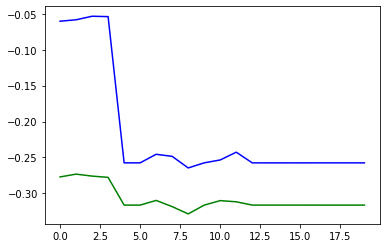

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(len(twfiles)), shifts[0, :], "b-")
plt.plot(range(len(twfiles)), shifts[1, :], "g-")

In [5]:
# determine the aveage values for each tile
#    set the range to be the number of tiles and the 
for k in range(n_tiles):
    k1 = k * n_images_per_tile
    k2 = k1 + n_images_per_tile
    avex = np.average(sigma_clip(shifts[0, k1:k2]))
    avey = np.average(sigma_clip(shifts[1, k1:k2]))
    print(k, avex, avey)

0 -0.05647150365601337 -0.2759964433337788
1 -0.25227164704614663 -0.31523502700888206
2 -0.2545612377015838 -0.3166996893456614
3 -0.257545863147537 -0.31632086761441347
4 -0.2575264791579155 -0.3163360127396757
